 Problem Statement:

 Yulu's revenue has recently experienced signi cant declines. In order to comprehend the variables that affect the demand for these shared
 electric cycles, they have hired a consultancy rm. They are particularly interested in comprehending what in uences demand for these shared
 electric cycles in the Indian market.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/CSV datasets/yulu.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [8]:
 # Check for null values in the DataFrame
 null_counts = df.isnull().sum() # or df.isna()
 print(null_counts)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [9]:
 #data types of all the attributes
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
 columns = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
 df[columns] = df[columns].astype(object)
 #conversion of categorical attributes to 'category' (If required)
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    10886 non-null  object
 1   season      10886 non-null  object
 2   holiday     10886 non-null  object
 3   workingday  10886 non-null  object
 4   weather     10886 non-null  object
 5   temp        10886 non-null  object
 6   atemp       10886 non-null  object
 7   humidity    10886 non-null  object
 8   windspeed   10886 non-null  object
 9   casual      10886 non-null  object
 10  registered  10886 non-null  object
 11  count       10886 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1020.7+ KB


In [11]:
 #Checking the characteristics of the data:
 df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00,10886.00,10886.0,10886.0,10886.0,10886.0,10886.000000
unique,10886,4.0,2.0,2.0,4.0,49.00,60.00,89.0,28.0,309.0,731.0,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,14.76,31.06,88.0,0.0,0.0,3.0,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,467.00,671.00,368.0,1313.0,986.0,195.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.574132
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.144454
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.000000


Observations:

 1.Among 4seasons ,season-4 winter has the more count of rental bikes.

 2.on weekends/holidays ,more count of rental bikes.

 3.Among 4 weather conditions,weather cond-1( Clear, Few clouds, partly cloudy, partly cloudy)has highest count of rental bikes.

 4.Highest temp -49C among that highest count of rental bikes took around 14.76C.

 5.Highest atemp -60C among that highest count of rental bikes took around 31C.

 6.count of registered users are 731 among them 3 users are using bikes.

In [12]:
 df.groupby('season')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


season-4 having more count of rental bikes

In [13]:
 df.groupby('holiday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [14]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


weather cond-1 having more count of rental bikes with mean 205.24

In [15]:
 df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


on weekends/holidays peak in count of rental bikes

In [16]:
df.groupby('temp')['count'].count().nlargest(5)

,count
temp,
14.76,467
26.24,453
28.70,427
13.94,413
18.86,406


 when temp-14.76 count of bikes is high

In [17]:
pd.crosstab(index = df['season'],columns = df['workingday'])

workingday,0,1
season,,
1,858,1828
2,840,1893
3,888,1845
4,888,1846


In summer on weekend/holidays -more count of rental bikes i.e.1893 bikes

In [18]:
 pd.crosstab(index = df['season'],columns = df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In fall season under weather cond- Clear/Few clouds-more count of rental bikes i.e.1930 bikes

Univariate analysis

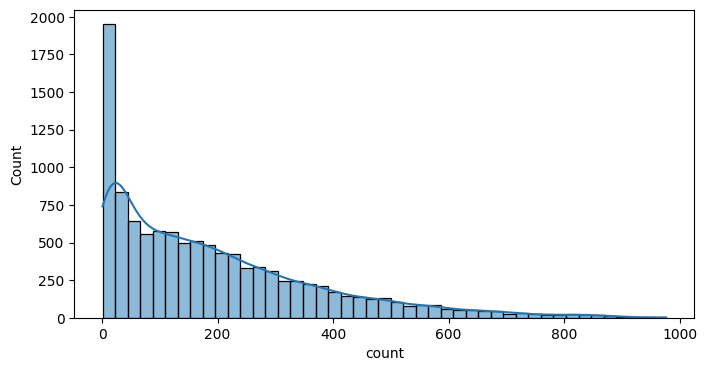

In [19]:
 plt.figure(figsize=(8,4))
 sns.histplot(data=df, x="count", kde=True)
 plt.show()

 1.we can observe that less than 400 bikes are using by around 250 customers.

 2.From the initial observation we have already seen the mean and median is 191 and 145 respectively. Also, we can see there are outliers in the
 data.

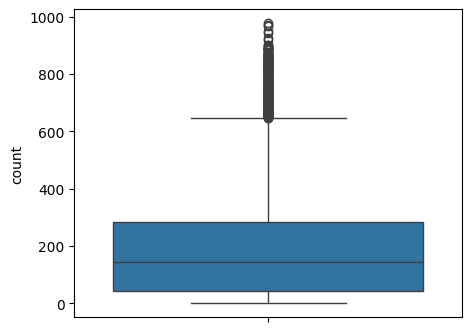

In [21]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='count')
plt.show()

q1 q3 iqr: 42.0 284.0 242.0
lower_limit,upper_limit: -321.0 647.0
before removing outliers: 10886
after removing outliers: 10583
num of outliers: 303
                  datetime season holiday workingday weather   temp   atemp  \
0      2011-01-01 00:00:00      1       0          0       1   9.84  14.395   
1      2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
2      2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
3      2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
4      2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                    ...    ...     ...        ...     ...    ...     ...   
10881  2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
10882  2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
10883  2012-12-19 21:00:00      4       0          1       1  13.94   15.91   
10884  2012-12-19 22:00:00      4       0          1       1

<Axes: ylabel='count'>

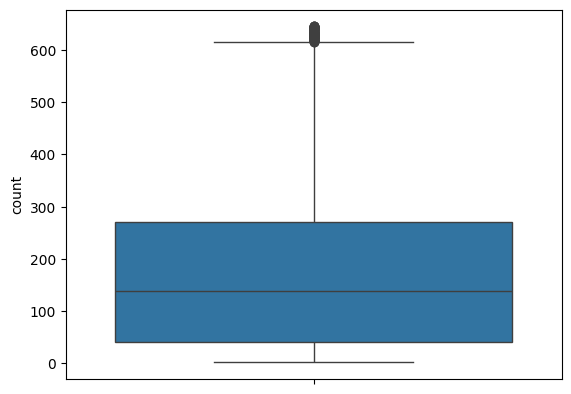

In [22]:
 # Outlier detection by IQR method
 q1= df['count'].quantile(0.25)
 q3= df['count'].quantile(0.75)
 iqr = q3-q1 # iqr- inter quatile range
 print('q1','q3','iqr:',q1,q3,iqr)
 lower_limit = q1 - (1.5*iqr)
 upper_limit = q3 + (1.5*iqr)
 print('lower_limit' ',' 'upper_limit:', lower_limit, upper_limit)
 #trimming - delete outlier data
 new_df = df.loc[(df['count'] < upper_limit) & (df['count'] > lower_limit)]
 print('before removing outliers:', len(df))
 print('after removing outliers:', len(new_df))
 print('num of outliers:',len(df)-len(new_df))
 #capping - upper,lower limit
 new_df.loc[(new_df['count'] > upper_limit), 'count'] = upper_limit
 new_df.loc[(new_df['count'] < lower_limit), 'count'] = lower_limit
 print(new_df)
 sns.boxplot(new_df['count'])

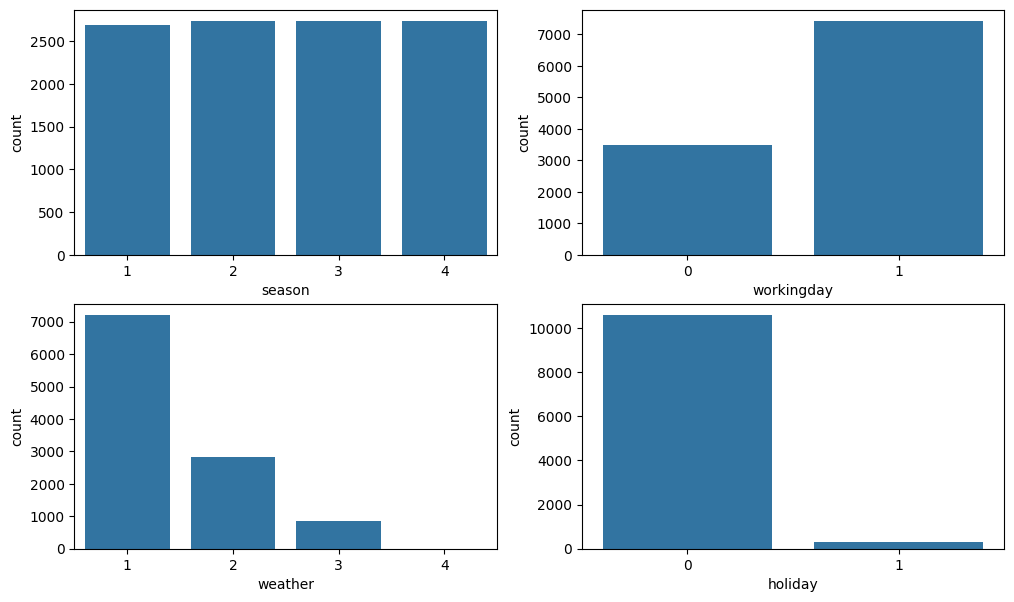

In [23]:
 fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
 sns.countplot(data=df, x='season', ax=axs[0,0])
 sns.countplot(data=df, x='workingday', ax=axs[0,1])
 sns.countplot(data=df, x='weather', ax=axs[1,0])
 sns.countplot(data=df, x='holiday', ax=axs[1,1])
 plt.show()

observations from above graphs by univariate analysis:

 1.Almost all seasons had uniform good count of bikes.

 2.weekned/holiday had more count.

 3.weather-1 Clear, Few clouds, partly cloudy, partly cloudy had more count followed by 2 ,3

Bivariate analysis

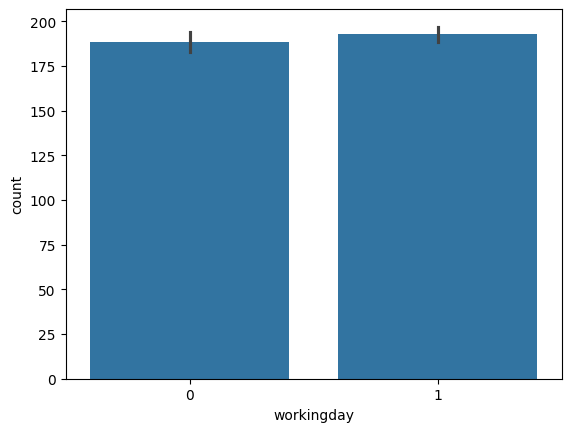

In [25]:
# Relationship between workday and count
sns.barplot(data=df, x='workingday', y='count')
plt.show()

 Bar plot gives- mean value count

 On workingdays the mean value count is less than weekend/holidays coun

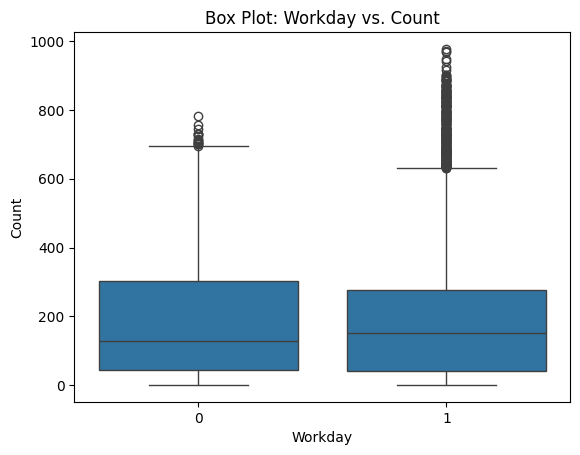

In [26]:
 #Box plot with outliers -bivariate analysis
 sns.boxplot(data=df, x='workingday', y='count')
 plt.title('Box Plot: Workday vs. Count')
 plt.xlabel('Workday')
 plt.ylabel('Count')
 plt.show()

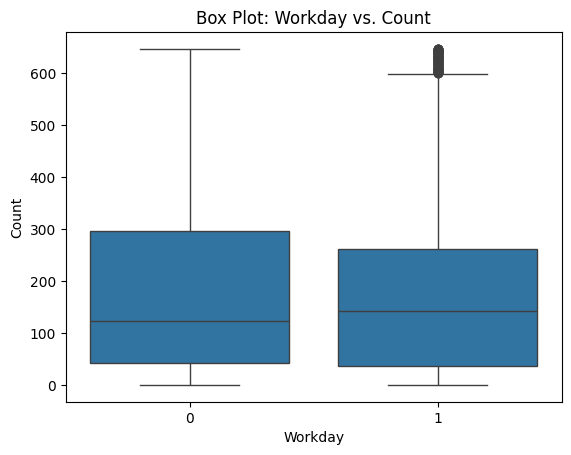

In [27]:
 #Box plot after removing outliers -bivariate analysis
 #box plot can use to visualize relationship between categorical vs numeric variables.
 sns.boxplot(data=new_df, x='workingday', y='count')
 plt.title('Box Plot: Workday vs. Count')
 plt.xlabel('Workday')
 plt.ylabel('Count')
 plt.show()

From box plot

Among workingday and weekend/holiday we can observe the count of bikes is between 45 t0 300

 Relationship between season and count

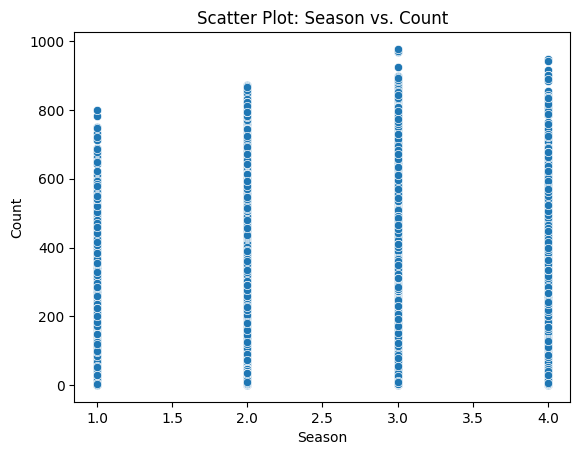

In [28]:
 #we can use a scatter plot to visualize the relationship between two numeric variables.
 sns.scatterplot(data=df, x='season', y='count')
 plt.title('Scatter Plot: Season vs. Count')
 plt.xlabel('Season')
 plt.ylabel('Count')
 plt.show()

 Among 4 seasons ,season-3 had more count of rental bikes with count near to 950,followed by season-4,2,1

Relationship between weather and count

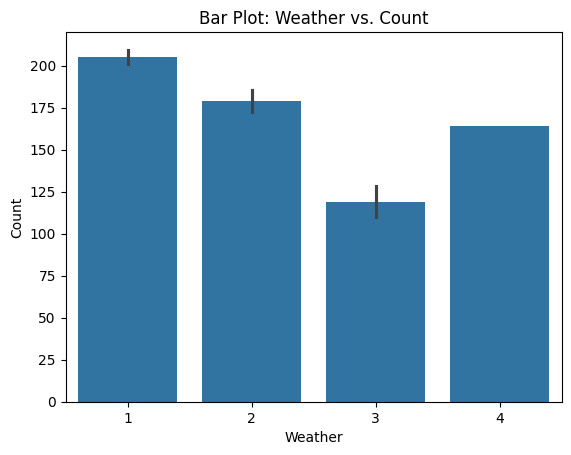

In [31]:
sns.barplot(data=df, x='weather', y='count')
plt.title('Bar Plot: Weather vs. Count')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

Among 4 weather conditions,weather condition-1 had more average count (>200)followed by weather conditions-2,4,3

Hypothesis Testing

In [32]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


 2 sample ttest:

In [34]:
#Null Hypothesis (H0): There is no significant difference in the number of bikes rented between working days and non-working days.
#Alternative Hypothesis (H1): There is a significant difference in the number of bikes rented between working days and non-working days.
a = df[df['workingday'] == 0]['count']
b = df[df['workingday'] == 1]['count']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a,b)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.22644804226361348
Fail to reject H0


 observations:

 1.As (p-value=0.22) > 0.05 we should accept HO statistically at at 5% signi cance.

 2.By two sample ttest we can say statistically that there is a no difference in mean count of rental bikes on weekends/holidays to working days at 5% significance.

ANNOVA test -- To check if No. of cycles rented is similar or different in different

 1.season 2.weather

season vs count

In [35]:
s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']

In [39]:
#checking anova test assumptions:by levene method
from scipy.stats import levene
import numpy as np
#levene test
levene_p_value = levene(s1,s2,s3,s4, center='median')[1]
print("levene test p-value", round(levene_p_value,2))
print("Variance of s1:",round(np.var(s1),2))
print("Variance of s2:",round(np.var(s2),2))
print("Variance of s3:",round(np.var(s3),2))
print("Variance of s4:",round(np.var(s4),2))


levene test p-value 0.0
Variance of s1: 15687.73
Variance of s2: 36853.52
Variance of s3: 38854.3
Variance of s4: 31538.18


 observations:

 1.Statistically we can conclude that variances are not equal by performing levene test for 4 seasons.

 2.variances of season -2,3,4 are similar but season-1 had quite large difference

In [40]:
 from scipy.stats import f_oneway
 #H0 : season wrt count are equal
 #Ha : Not  equal
 test_statistic, p_value = f_oneway(s1,s2,s3,s4)
 print(p_value)
 if p_value < 0.05:
  print("Reject H0")
 else:
  print("Fail to reject H0")

6.164843386499654e-149
Reject H0


 observations:

 1.As p-value < 0.05 we should reject HO statistically at at 5% signi cance.

 2.From one anova test we can conclude , seasons has a impact on yulu bikes count at 5% signi cance.

 3.Accept Ha:signi cant difference in count in different seasons

weather vs count

In [41]:
 w1 = df[df['weather'] == 1]['count']
 w2 = df[df['weather'] == 2]['count']
 w3 = df[df['weather'] == 3]['count']
 w4 = df[df['weather'] == 4]['count']
 from scipy.stats import f_oneway
 #H0 : weather wrt count are equal
 #Ha : Not  equal
 test_statistic, p_value = f_oneway(w1,w2,w3,w4)
 print(p_value)
 if p_value < 0.05:
  print("Reject H0")
 else:
  print("Fail to reject H0")


5.482069475935669e-42
Reject H0


 observations:

 1.As p-value < 0.05 we should reject HO statistically at at 5% signi cance.

 2.From one anova test we can conclude , weather has a impact on yulu bikes count at 5% signi cance.

 3.Accept Ha:signi cant difference in count in different weathers

In [42]:
 from scipy.stats import levene
 #levene test
 levene_p_value = levene(w1,w2,w3,w4, center='median')[1]
 print("levene test p-value", round(levene_p_value,2))
 print("Variance of w1:",round(np.var(w1),2))
 print("Variance of w2:",round(np.var(w2),2))
 print("Variance of w3:",round(np.var(w3),2))
 print("Variance of w4:",round(np.var(w4),2))

levene test p-value 0.0
Variance of w1: 35323.89
Variance of w2: 28337.25
Variance of w3: 19182.42
Variance of w4: 0.0


 observations:

 1.Statistically we can conclude that variances are not equal by performing levene test for 4 weather conditions.

 2.variances of weather conditions -1,2 are near and weather-3 had quite large difference followed by weather-4 had zero variance(bcz no count
 of rental bikes on that weather condition).

 Normality test:

<Figure size 640x480 with 0 Axes>

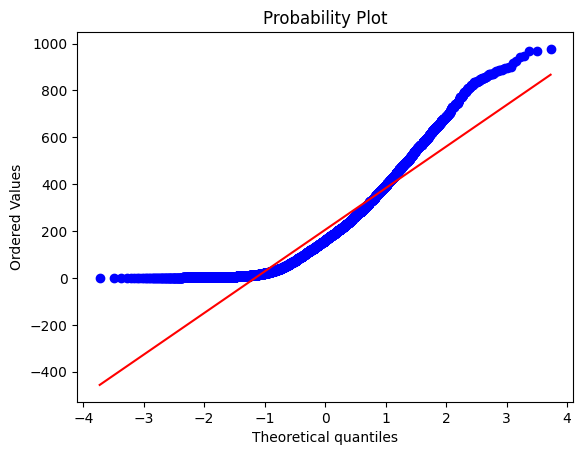

<Figure size 640x480 with 0 Axes>

In [43]:
 #Normality test for weather-1
from scipy import stats
stats.probplot(w1,plot=plt)
plt.figure()

From above plot we can conclude that data points are away from linear line implies that data is not normally distributed for weather condition-1

Shapiro test:

In [44]:
 #Shapiro test for weather-1
 #H0 : data is normally distributed
 #Ha : data not  normally distributed
 test_statistic, p_value = stats.shapiro(w1)
 print(p_value)
 if p_value < 0.05:
  print("Reject H0")
 else:
  print("Fail to reject H0")

1.5964921477006555e-57
Reject H0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


As p-value< 0.05 we conclude that data is not normally distributed

Chi-square test to check if Weather is dependent on the season

In [45]:
 #Null Hypothesis (H0): weather and season are independent
 #Alternative Hypothesis (Ha):weather and season are dependent
 from scipy.stats import chi2_contingency
 contingency = pd.crosstab(index = df['season'],columns = df['weather'])
 contingency
 test_statistic, p_value, dof, expected_values = chi2_contingency(contingency)
 print("Test statistic:", test_statistic)
 print("p-value:", p_value)
 alpha = 0.05
 if(p_value < alpha):
  print("Reject H0 ")
 else:
  print("Fail to Reject H0 ")

Test statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Reject H0 


observations:

 1.After performing chisquare test, we can conclude that there is a signi cant impact on season with respect to weather conditions.

 2.Aceept Ha: weather and season are dependent

# Insights:

1.Two sample ttest suggests that we should accept HO statistically at at 5% signi cance (As (p-value=0.22) > 0.05.)

 2.By two sample ttest we can say statistically that there is a no difference in mean count of rental bikes on weekends/holidays to working days
 at 5% signi cance.

 3.From one anova test we can conclude , season and weather has a impact on yulu bikes count at 5% signi cance and Statistically we can
 conclude that variances are not equal by performing levene test for all weather conditions and for all seasons.

 4.chisquare test, had a signi cant impact on season with respect to weather conditions.

 5.Among 4 seasons ,season-3 had more count of rental bikes with count near to 950,followed by season-4,2,1

 6.weather cond-1 having more count of rental bikes with mean 205.24 followed by 2,3,4.

 7.In summer on weekend/holidays -more count of rental bikes i.e.1893 bikes.

 8.In fall season under weather cond- Clear/Few clouds-more count of rental bikes i.e.1930 bikes

 Recommendations:

 1.on working days yulu can offer some special discounts on rides for students near by colleges and for employess,by that they can manage
 their rides similar to on holidays count.

 2.weather cond-3 having less count of riders ,so yulu can provide some rain coats to riders this may increse count in this condition.

 3.By offering discounts based on proffession may increse the count of rental bikes showcasing adds on mobile app.

 4.Ensuring safety measures like helmat,raincoats ,glasses may attract few customers to increse count.

 5.Proper maintaince and servicing of bikes may attract more count.

 6.Yulu can showcase that their bikes are environment eco friendly with less co2 emmissions by releasing less smoke and low noise will give
 comfort to customers.